In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
nh_provider_df = pd.read_csv("thanh_import/nh_provider_thanh_copy.csv")

nh_provider_df = nh_provider_df.rename(columns={"Reported Nurse Aide Staffing Hours per Resident per Day":"CNA staffing hours", 
                                                "Reported LPN Staffing Hours per Resident per Day":"LPN staffing hours",
                                                "Reported Total Nurse Staffing Hours per Resident per Day":"total nurse staffing hours",
                                                "Total nursing staff turnover":"turnover"})

## Looking at all NH Providers Staff Rating in California

In [4]:
all_nh_provider_fig = px.scatter_mapbox(nh_provider_df, 
                         lat='Latitude', 
                         lon='Longitude',
                         color='Staffing Rating',
                         mapbox_style="open-street-map",
                         center={"lat": 36.7783, "lon": -119.4179})

all_nh_provider_fig.show()

## Looking more Specific into LMC Unions
* Find correlation between these column: ['Staffing Rating', 'CNA staffing hours', 'LPN staffing hours', 'total nurse staffing hours', 'turnover']

Explaination:\
For example, positive correlation is like someone who study more tend to gets higher grade


In [5]:
columns = ['Staffing Rating','CNA staffing hours','LPN staffing hours','total nurse staffing hours','turnover']

lmc_union_df = nh_provider_df.loc[(nh_provider_df["State"] == "CA") & (nh_provider_df['Union (1/31/2024)'] == 'SEIU Local 2015') & (nh_provider_df['Is LMC'] == 'Y')]
lmc_union_subset = lmc_union_df[columns]

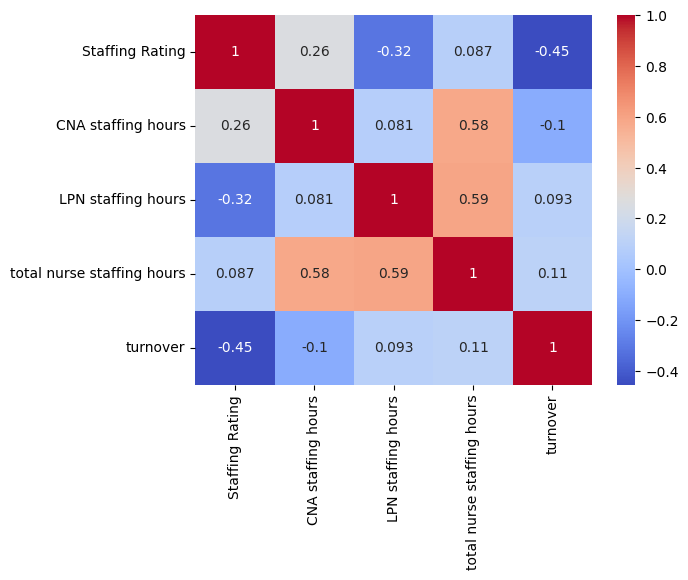

In [5]:
lmc_union_correlation_matrix = lmc_union_subset.corr()
sns.heatmap(lmc_union_correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

### Scatter plot with just LMC Union of Staffing Rating

In [6]:
lmc_union_fig = px.scatter_mapbox(lmc_union_df, 
                         lat='Latitude', 
                         lon='Longitude',
                         color='Staffing Rating',
                         mapbox_style="open-street-map",
                         center={"lat": 36.7783, "lon": -119.4179})

lmc_union_fig.show()

## Look into ALL LMC (not just Union)

In [7]:
# All LMC "Y"
lmc_df = nh_provider_df.loc[nh_provider_df['Is LMC'] == 'Y']
lmc_df_subset = lmc_df[columns]

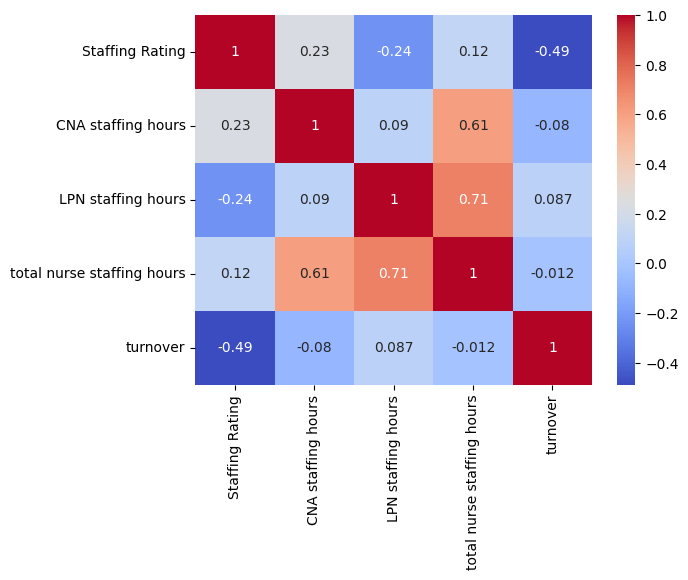

In [8]:
correlation_matrix = lmc_df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()